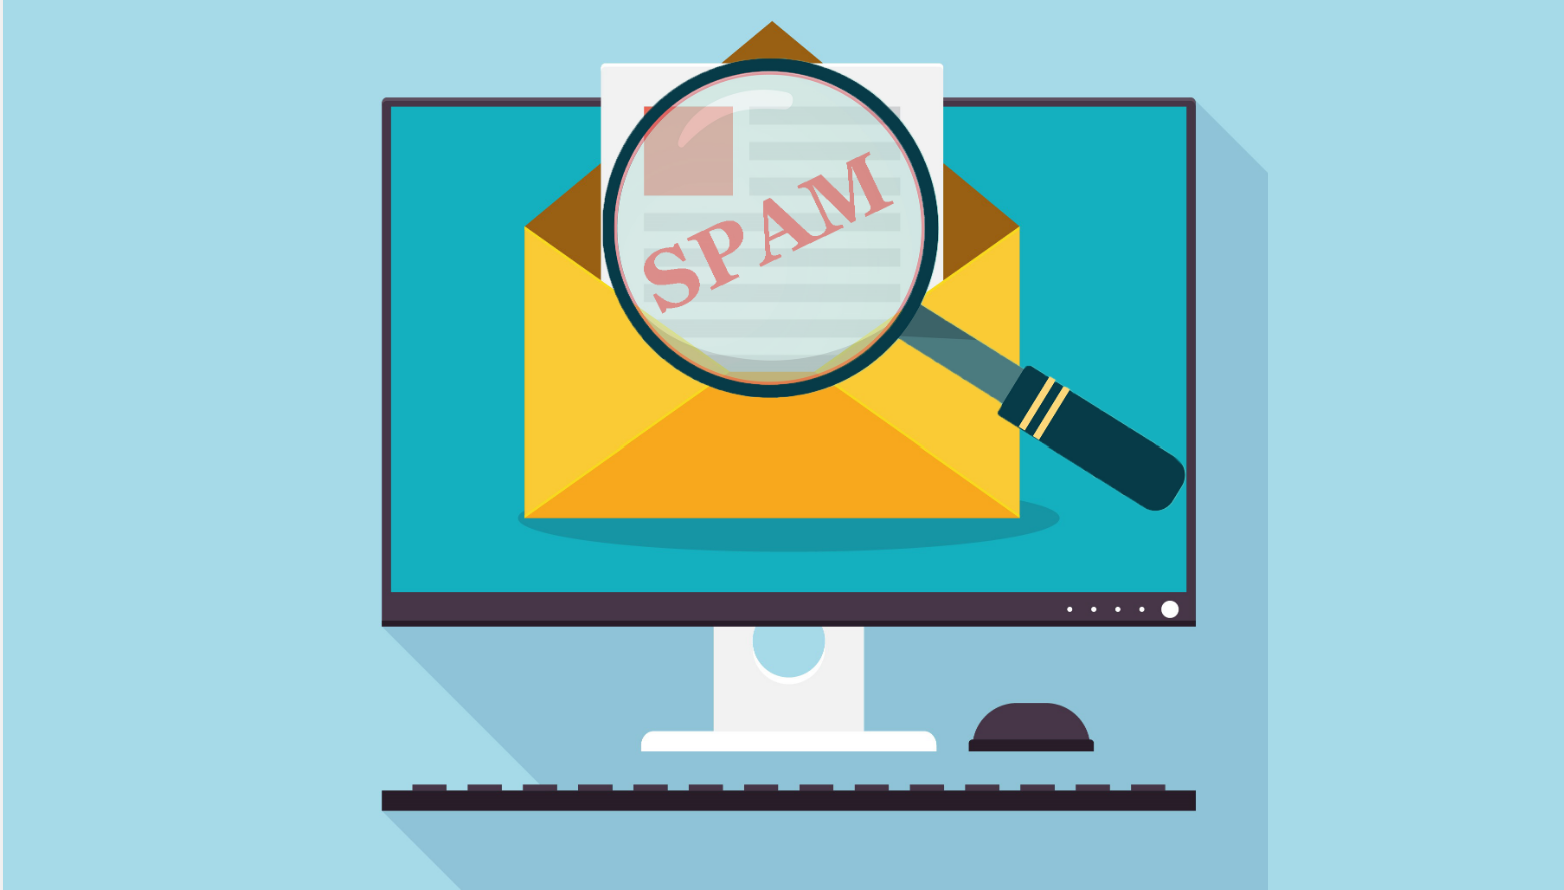

**Description:**

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...

Our collection of spam e-mails came from our postmaster and individuals who had filed spam. Our collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter.

The dataset, taken from the UCI ML repository, contains about 4600 emails labelled as spam or ham.

**Acknowledgements:**

This dataset has been referred from Kaggle.

**Objective:**

* Understand the Dataset & cleanup (if required).
* Build classification models to predict whether or not the email is spam.
* Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.

# **Data Exploration**

In [2]:
!pip install scikit-plot

In [3]:
!pip install catboost

In [4]:
#Importing the basic librarires

import os
import math
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from scipy.stats import randint
from scipy.stats import loguniform
from IPython.display import display

from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from scikitplot.metrics import plot_roc_curve as auc_roc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
f1_score, roc_auc_score, roc_curve, precision_score, recall_score

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)
# for visualization
import matplotlib as mpl
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from wordcloud import WordCloud
# nltk used for NLP
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# Preprocessing (sklearn)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Modeling
from sklearn.ensemble import RandomForestClassifier
from lightgbm.sklearn import LGBMClassifier
import xgboost as xgb
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
# Neural Network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, GlobalMaxPooling1D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# scoring
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, RocCurveDisplay

# styling
plt.style.use('ggplot')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#Importing the dataset

file = '/content/drive/MyDrive/Treue Intership file/spam.csv'
df = pd.read_csv(file,encoding='ISO-8859-1')
#df.drop([''],axis=1, inplace=True)

target = 'spam'
labels = ['Ham','Spam']
features = [i for i in df.columns.values if i not in [target]]

original_df = df.copy(deep=True)
display(df.head())

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN



Inference: The Datset consists of 5 features & 5572 samples.


In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
#Renaming the Columns
df.rename({'v1':'Type','v2':'SMS'},axis=1,inplace=True)
df

,Type,SMS,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [10]:
## Removing the Last Three Columns

final_df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
final_df.sample(5)

,Type,SMS
4721,ham,"I'm home, my love ... If your still awake ... ..."
2353,spam,Please CALL 08712402902 immediately as there i...
3232,ham,Height of recycling: Read twice- People spend ...
1169,ham,Msgs r not time pass.They silently say that I ...
2093,spam,Final Chance! Claim ur å£150 worth of discount...


In [11]:
## Changing My Target to Labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
final_df['Type'] = le.fit_transform(final_df['Type'])

In [12]:
## Checking Missing Values
final_df.isnull().sum()

Type    0
SMS     0
dtype: int64

In [13]:
##Remove Duplicates
final_df = final_df.drop_duplicates(keep='first')
final_df.head()

,Type,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#Checking number of unique rows in each feature

final_df.nunique().sort_values()

Type       2
SMS     5169
dtype: int64

In [15]:
#Checking the stats of all the columns

display(final_df.describe())

,Type
count,5169.000000
mean,0.126330
std,0.332253
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [16]:
final_df.shape

(5169, 2)

In [17]:
final_df.duplicated().sum()

0

# **Exploratory Data Analysis (EDA)**

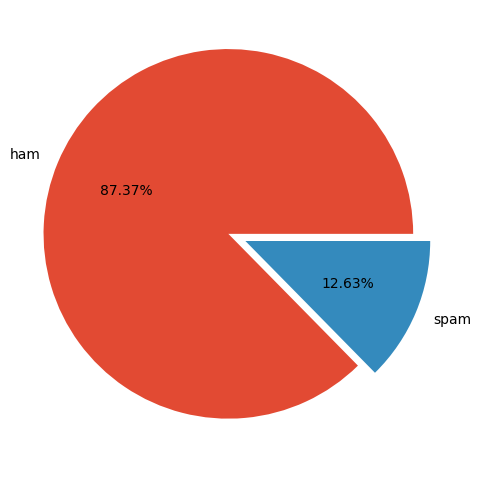

In [18]:
plt.pie(final_df['Type'].value_counts(),labels=['ham','spam'],autopct='%0.2f%%',explode=[0.1,0])
plt.show()

In [19]:
# data is imbalaced
## Now we are going to do Analysis on No. of Characters, Words, and Sentences Used in every Message

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
## Number of Characters
final_df['num_characters'] = final_df['SMS'].apply(len)
final_df.head()

,Type,SMS,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
## Number of Words
final_df['num_words'] = final_df['SMS'].apply(lambda x:len(nltk.word_tokenize(x)))
final_df.head()

,Type,SMS,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [22]:
final_df['num_sentences'] = final_df['SMS'].apply(lambda x:len(nltk.sent_tokenize(x)))
final_df.head()

,Type,SMS,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [23]:
##ham
final_df[final_df['Type'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
## spam
final_df[final_df['Type'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


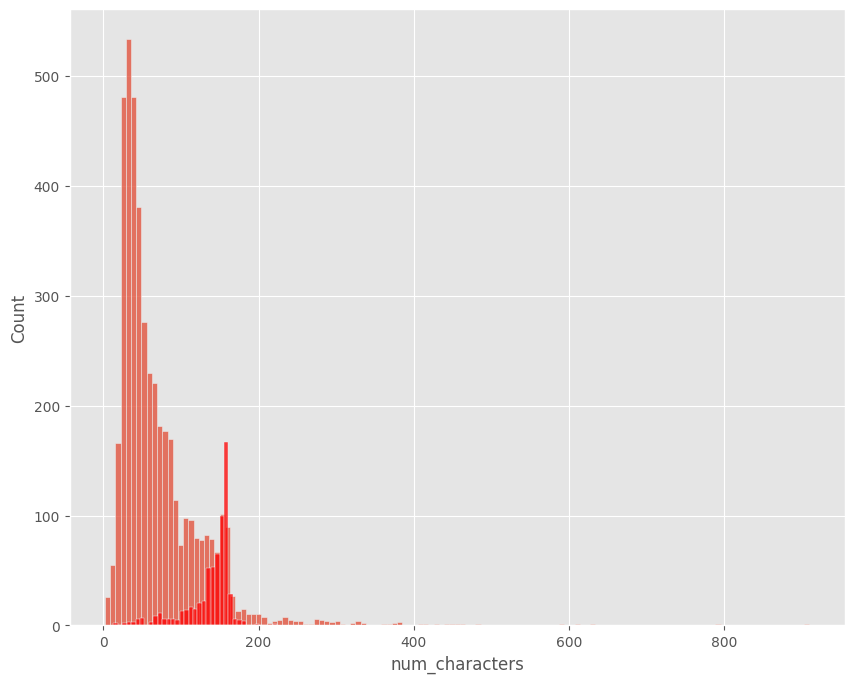

In [25]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.histplot(final_df[final_df['Type'] == 0]['num_characters'])
sns.histplot(final_df[final_df['Type'] == 1]['num_characters'],color='red')
plt.show()

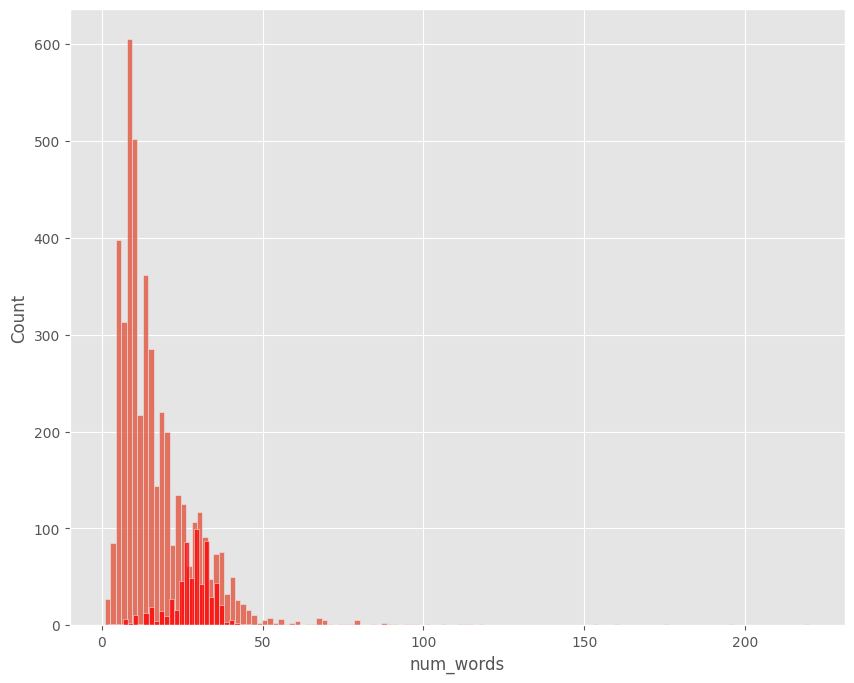

In [26]:
plt.figure(figsize=(10,8))
sns.histplot(final_df[final_df['Type'] == 0]['num_words'])
sns.histplot(final_df[final_df['Type'] == 1]['num_words'],color='red')
plt.show()

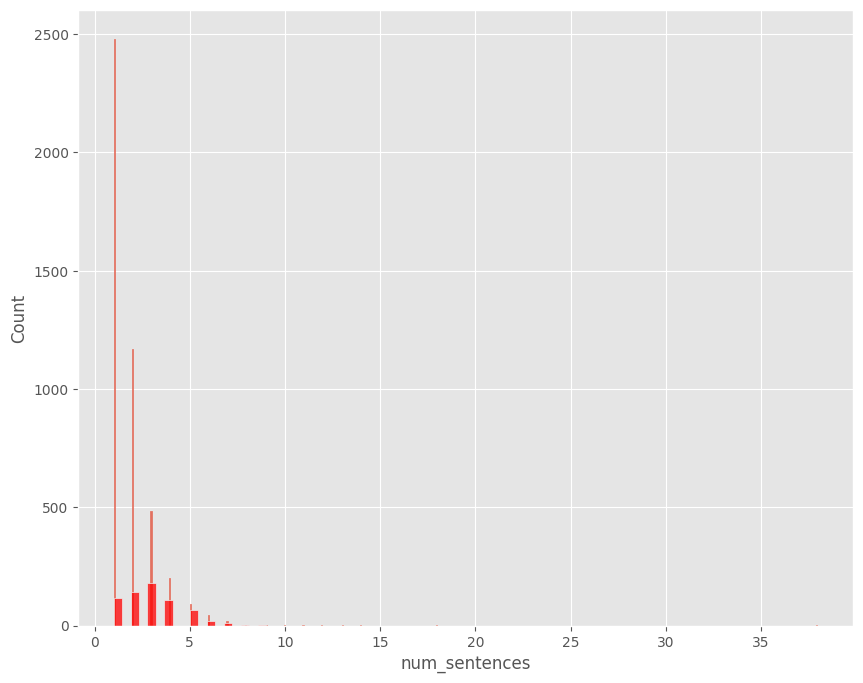

In [27]:
plt.figure(figsize=(10,8))
sns.histplot(final_df[final_df['Type'] == 0]['num_sentences'])
sns.histplot(final_df[final_df['Type'] == 1]['num_sentences'],color='red')
plt.show()

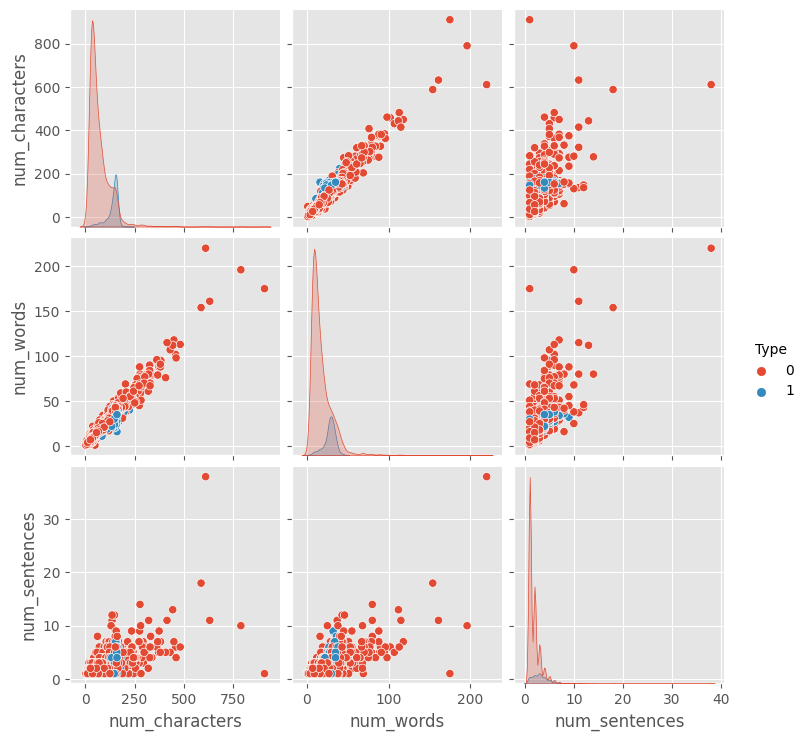

In [28]:
sns.pairplot(final_df,hue='Type')
plt.show()

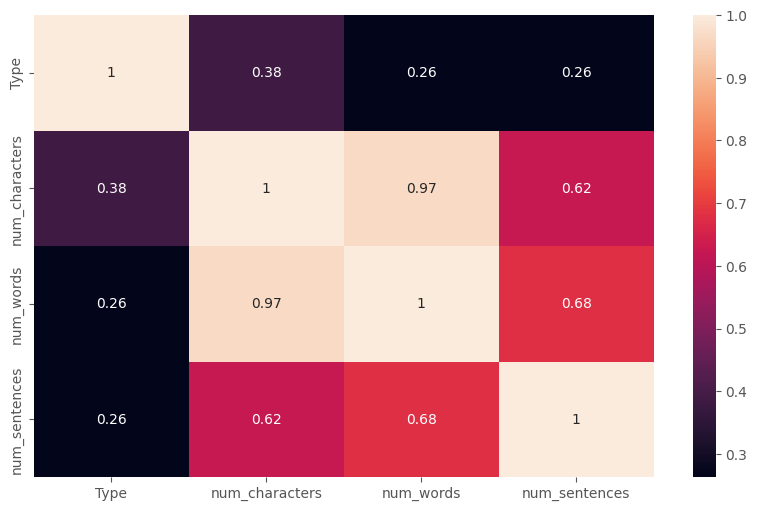

In [29]:
sns.heatmap(final_df.corr(),annot=True)
plt.show()

<Axes: xlabel='Type', ylabel='num_characters'>

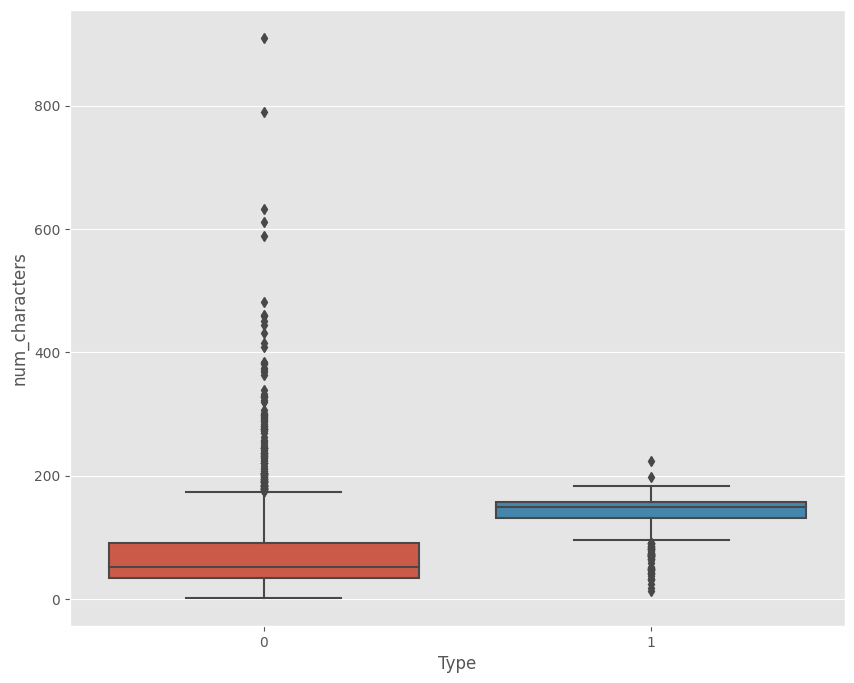

In [30]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Type',y='num_characters',data=final_df)

# **Data Preprocessing**

1. Lowercase
2. Tokenization
3. Removing Special Character
4. Removing stop words and punctuation
5. stemming

In [31]:
# let's do data preprocessing like remove punctucation, stopwords, stemming.
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer

ps = PorterStemmer()

def text_processing(text):
    text = nltk.word_tokenize(text.lower())
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            stemming = ps.stem(i)
            y.append(stemming)

    return " ".join(y)

In [32]:
text_processing('I Loved the YT Lectures on machine Learning What About You! dacing dance danced')

'love yt lectur machin learn dace danc danc'

In [33]:
final_df['transformed_text'] = final_df['SMS'].apply(text_processing)

In [34]:
final_df.head()

,Type,SMS,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [35]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

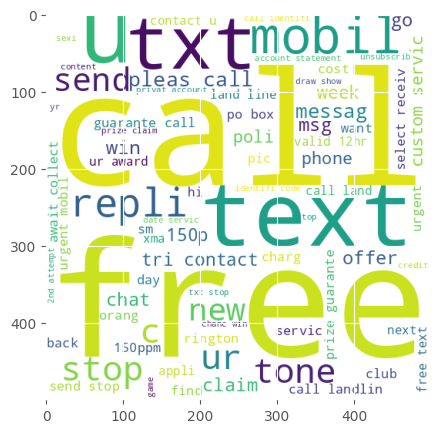

In [36]:
## Spam Word Cloud
spam_wc = wc.generate(final_df[final_df['Type'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize=(8,5))
plt.imshow(spam_wc)
plt.show()

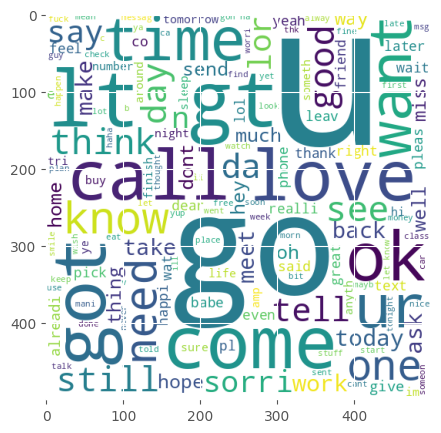

In [37]:
## Ham Word Cloud
ham_wc = wc.generate(final_df[final_df['Type'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize=(8,5))
plt.imshow(ham_wc)
plt.show()

In [38]:
## Converting Spam Messages to List of Words
x = final_df[final_df['Type'] == 1]['transformed_text'].str.cat(sep= " ")
spam_msg_word_list = x.split()
len(spam_msg_word_list)

9939

In [39]:
df.head()

,Type,SMS,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [40]:
category_ct = df['Type'].value_counts()

fig = px.pie(values=category_ct.values,
             names=category_ct.index,
             color_discrete_sequence=px.colors.sequential.OrRd,
             title= 'Pie Graph: spam or not')
fig.update_traces(hoverinfo='label+percent', textinfo='label+value+percent', textfont_size=15,
                  marker=dict(line=dict(color='#000000', width=2)))
fig.show()

In [41]:
categories = pd.get_dummies(df["Type"])
spam_or_not = pd.concat([df, categories], axis=1)
spam_or_not.drop('Type',axis=1,inplace=True)

df["length"] = df["SMS"].apply(len)

ham = df.loc[np.where(spam_or_not['ham'] == 1)].reset_index()
spam = df.loc[np.where(spam_or_not['ham'] == 0)].reset_index()

ham.drop('index',axis=1,inplace=True)
spam.drop('index',axis=1,inplace=True)

In [42]:
hist_data = [ham['length'],spam['length']]

group_labels = ['ham','spam']

colors = ['black', 'red']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors)

# Add title
fig.update_layout(title_text='Length distribution of ham and spam messages',
                 template = 'simple_white')
fig.show()

In [43]:
# function to get all of strings from dataframe column, and used lower function here.
def get_all_str(df):
    sentence = ''
    for i in range(len(df)):
        sentence += df['SMS'][i]
    sentence = sentence.lower()
    return sentence

def get_str(lst):
    sentence = ''
    for char in lst:
        sentence += char+' '
    sentence = sentence.lower()
    return sentence

# function to get words from text(string). used RegexpTokenizer
def get_word(text):
    result = nltk.RegexpTokenizer(r'\w+').tokenize(text.lower())
#     result = result.lower()
#     result = nltk.word_tokenize(text)
    return result

# function to add stopwords to nltp stopword list.
def stopword_list(stop):
    lst = stopwords.words('english')
    for stopword in stop:
        lst.append(stopword)
    return lst

# function to remove stopwords from list.
def remove_stopword(stopwords, lst):
    stoplist = stopword_list(stopwords)
    txt = ''
    for idx in range(len(lst)):
        txt += lst[idx]
        txt += '\n'
    cleanwordlist = [word for word in txt.split() if word not in stoplist]
    return cleanwordlist

# function to get dataframe from cleanwordlist.
def Freq_df(cleanwordlist):
    Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by=['Frequency'],ascending=False)
    df_freq = df_freq.reset_index()
    return df_freq

# function to lemmatize words
def lemmatization(words):
    lemm = WordNetLemmatizer()
    tokens = [lemm.lemmatize(word) for word in words]
    return tokens

In [44]:
# function to plot word cloud of words
def Word_Cloud(data, color_background, colormap, title):
    plt.figure(figsize = (20,15))
    wc = WordCloud(width=800,
               height=400,
               max_words=100,
               colormap= colormap,
               max_font_size=140,
               min_font_size = 2,
               random_state=8888,
               background_color=color_background).generate_from_frequencies(data)

    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

In [45]:
ham.tail(3)

,Type,SMS,Unnamed: 2,Unnamed: 3,Unnamed: 4,length
4822,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN,57
4823,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN,125
4824,ham,Rofl. Its true to its name,NaN,NaN,NaN,26


In [46]:
df=df.drop('Unnamed: 2', axis=1, inplace=False)

In [47]:
df=df.drop('Unnamed: 3', axis=1, inplace=False)
df=df.drop('Unnamed: 4', axis=1, inplace=False)

In [48]:
string = get_all_str(ham)
words = get_word(string)
removed = remove_stopword('1',words)
# show 10 words for example
print(removed[:10])

['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la']


In [49]:
freq_df = Freq_df(removed)
top_10 = freq_df[:10]

fig = px.bar(top_10, x = 'Term', y = 'Frequency',text = 'Frequency', color='Term',
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             title = 'Rank of Ham Terms',
             template = "simple_white"
              )

for idx in range(len(top_10)):
    fig.data[idx].marker.line.width = 2
    fig.data[idx].marker.line.color = "black"

fig.update_traces(textposition='inside',
                  textfont_size=11)
fig.show()

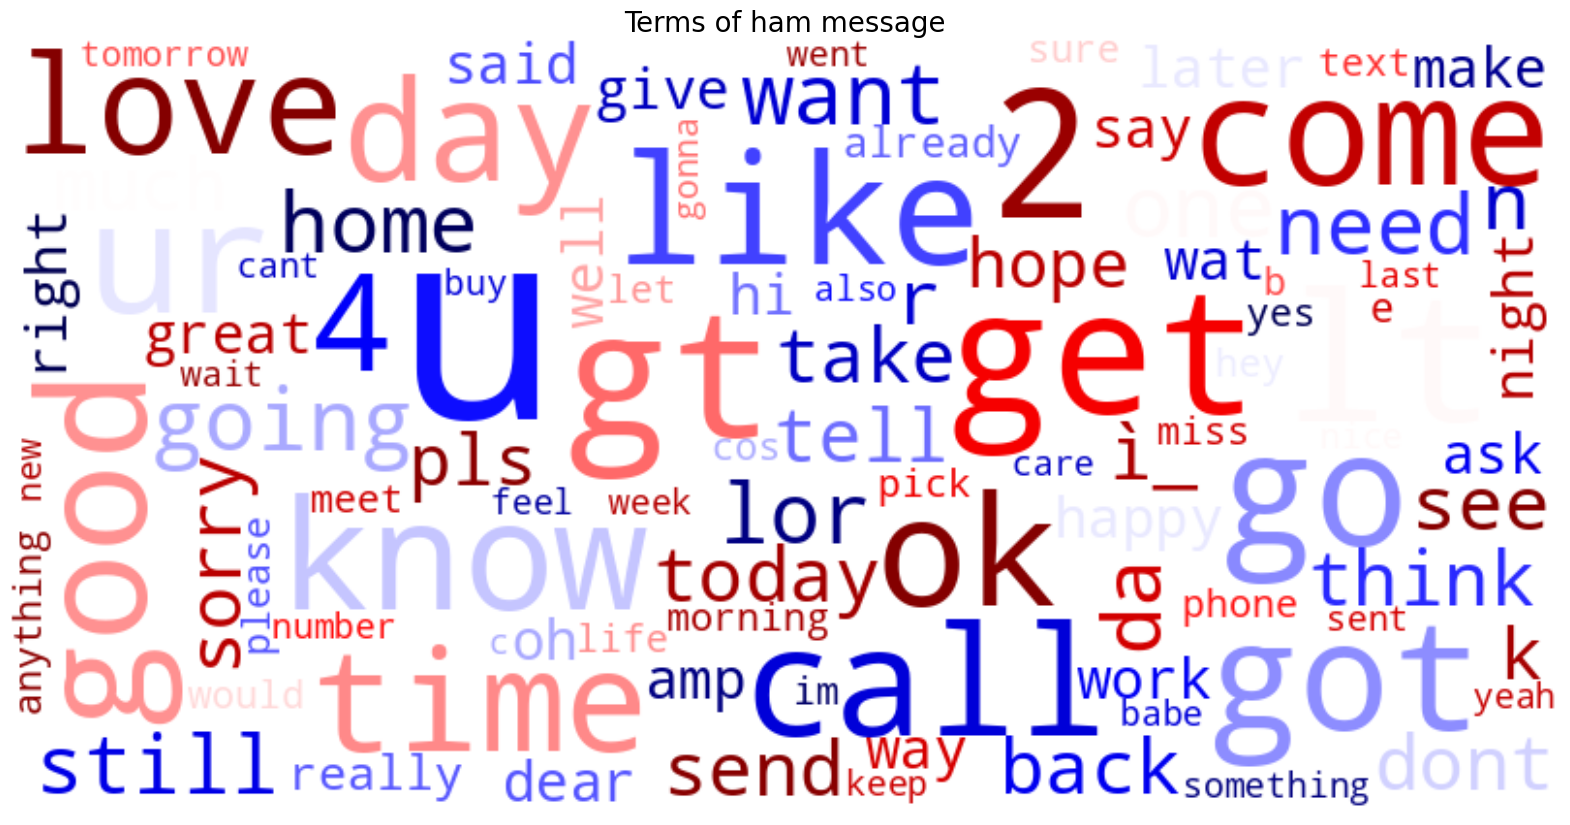

In [50]:
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']

ham_wordcloud = Word_Cloud(data ,'white', 'seismic', 'Terms of ham message')

In [51]:
string = get_all_str(spam)
words = get_word(string)
removed = remove_stopword('1',words)

In [52]:
# plt.figure(figsize=(20,5))
# sns.barplot(data = freq_df[:10],
#             x = 'Term', y = 'Frequency')
freq_df = Freq_df(removed)
top_10 = freq_df[:10]

fig = px.bar(top_10, x = 'Term', y = 'Frequency',text = 'Frequency',
             color_discrete_sequence=px.colors.sequential.PuRd,
             title = 'Rank of Spam Terms',
             template = "simple_white",
             color='Term')

for idx in range(len(top_10)):
    fig.data[idx].marker.line.width = 2
    fig.data[idx].marker.line.color = "black"

fig.show()

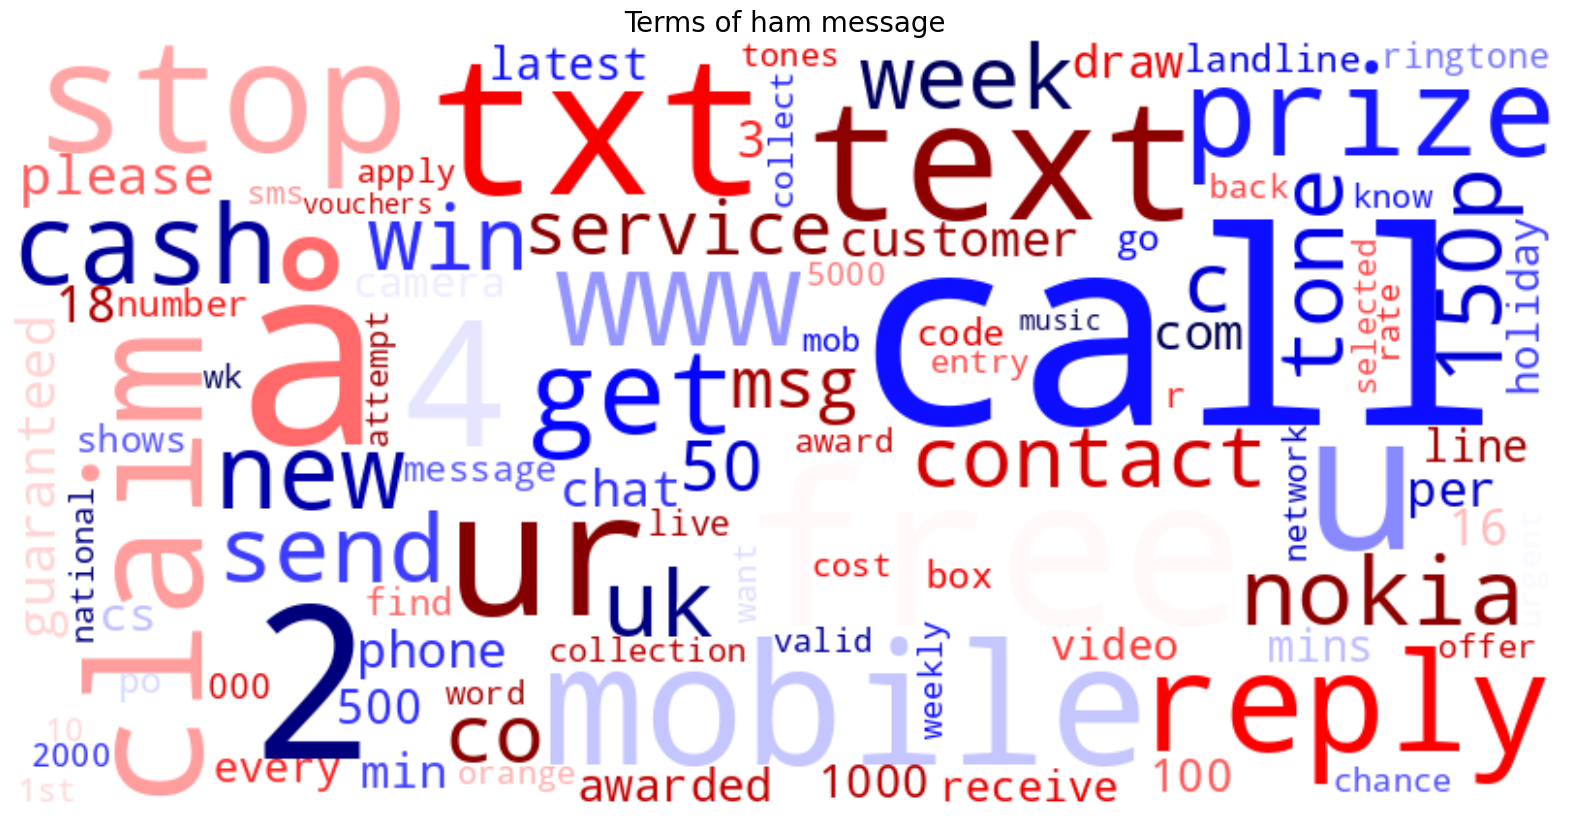

In [53]:
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']

spam_wordcloud = Word_Cloud(data, 'white','seismic', 'Terms of ham message')

In [54]:
def preprocess(sentence):
    words = get_word(sentence)
    words_ltz = lemmatization(words)
    removed = remove_stopword('1',words_ltz)
    return removed

In [55]:
df.replace('ham',1,inplace=True)
df.replace('spam',0,inplace=True)

In [56]:
df.head()

,Type,SMS,length
0,1,"Go until jurong point, crazy.. Available only ...",111
1,1,Ok lar... Joking wif u oni...,29
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,1,U dun say so early hor... U c already then say...,49
4,1,"Nah I don't think he goes to usf, he lives aro...",61


# **ML: MODELS**

In [57]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [58]:
vector = CountVectorizer(analyzer = preprocess)
X = vector.fit(df['SMS'])
X_transform = X.transform(df['SMS'])

In [59]:
tfidf_transformer = TfidfTransformer().fit(X_transform)
X = tfidf_transformer.transform(X_transform)

In [60]:
train_X, test_X, train_y, test_y = train_test_split(X, df['Type'], test_size=0.30, random_state = 8888)

In [61]:
rfc=RandomForestClassifier(random_state=8888)
lgbm = LGBMClassifier(boosting_type='gbdt',objective='binary',random_state=8888)
xgbr = xgb.XGBClassifier(objective='binary:hinge',random_state=8888)
svc = SVC(probability=True,random_state=8888)
catboost = CatBoostClassifier(random_state=8888, logging_level='Silent')

rfc.fit(train_X,train_y)
lgbm.fit(train_X, train_y)
xgbr.fit(train_X, train_y)
svc.fit(train_X, train_y)
catboost.fit(train_X,train_y,verbose=0)

classifiers = []
classifiers.append(svc)
classifiers.append(rfc)
classifiers.append(xgbr)
classifiers.append(lgbm)
classifiers.append(catboost)

model_name = ['SVC', 'Random Forest', 'XGBClassifier', 'LGBMClassifier', 'CatBoostClassifier']

In [62]:
accuracy_list = []
auc_list=[]
recall_list = []
f1_list = []

for classifier in classifiers :
    y_pred=classifier.predict(test_X)
    y_pred_proba=classifier.predict_proba(test_X)[:,1]
    accuracy_list.append(accuracy_score(test_y,y_pred))
    auc_list.append(roc_auc_score(test_y, y_pred_proba))
    recall_list.append(recall_score(test_y, y_pred))
    f1_list.append(f1_score(test_y, y_pred))

In [63]:
def plot_model_score(model_name, accuracy_list, auc_list, recall_list, f1_list, title):

    fig = go.Figure(data=[
        go.Bar(name='Accuracy', x=model_name, y=np.round(accuracy_list,3), text=np.round(accuracy_list,3), marker_color='#97bad9'),
        go.Bar(name='AUC',x=model_name, y=np.round(auc_list,3), text=np.round(auc_list,3), marker_color= '#bcd6ef'),
        go.Bar(name='Recall',   x=model_name, y=np.round(recall_list,3), text=np.round(recall_list,3), marker_color='#ebcad9'),
        go.Bar(name='F1',       x=model_name, y=np.round(f1_list,3), text=np.round(f1_list,3), marker_color='#d5a6bd')
    ])
    fig.update_layout(template = 'simple_white', title = title)
    fig.update_layout(xaxis_title="Models", yaxis_title="Score", font = dict(size=17, family = 'Franklin Gothic'))
    fig.update_layout(yaxis_range=[0.7,1])

    fig.show()

In [64]:
plot_model_score(model_name, accuracy_list, auc_list, recall_list, f1_list,
                 'Accuracy, AUC, Recall Score & F1 Score')

# **ML : Cross Validation**

In [65]:
# set random_state
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=8888)
cv_accuracy_results = []
cv_auc_results = []
cv_recall_results = []
cv_f1_results = []

for classifier in classifiers:
    cv_accuracy_results.append(cross_val_score(classifier, train_X, y = train_y, scoring = "accuracy", cv = kfold))
    cv_auc_results.append(cross_val_score(classifier, train_X, y= train_y, scoring = 'roc_auc', cv = kfold))
    cv_recall_results.append(cross_val_score(classifier, train_X, y= train_y, scoring = 'recall', cv = kfold))
    cv_f1_results.append(cross_val_score(classifier, train_X, y= train_y, scoring = 'f1', cv = kfold))


cv_accuracy_means = []
cv_auc_means = []
cv_recall_means = []
cv_f1_means = []

for fold in range(5):
    cv_accuracy_means.append(cv_accuracy_results[fold].mean())
    cv_auc_means.append(cv_auc_results[fold].mean())
    cv_recall_means.append(cv_recall_results[fold].mean())
    cv_f1_means.append(cv_f1_results[fold].mean())

In [66]:
plot_model_score(model_name, cv_accuracy_means, cv_auc_means, cv_recall_means, cv_f1_means, 'Cross Validation (5 fold)')

In [67]:
votingC = VotingClassifier(estimators=[('light gbm', lgbm),('Random Forest', rfc),
                                       ('Cat boost',catboost)],voting='soft')

votingC = votingC.fit(train_X, train_y)

v_accuracy = cross_val_score(votingC, train_X, y = train_y, scoring = "accuracy", cv = kfold)
v_auc = cross_val_score(votingC, train_X, y = train_y, scoring = "roc_auc", cv = kfold)
v_recall = cross_val_score(votingC, train_X, y = train_y, scoring = "recall", cv = kfold)
v_f1 = cross_val_score(votingC, train_X, y = train_y, scoring = "f1", cv = kfold)

votingC_accuracy_mean = v_accuracy.mean()
votingC_auc_mean = v_auc.mean()
votingC_recall_mean = v_auc.mean()
votingC_f1_mean = v_auc.mean()

model_name.append('Voting Classifier')
cv_accuracy_means.append(votingC_accuracy_mean)
cv_auc_means.append(votingC_auc_mean)
cv_recall_means.append(votingC_recall_mean),
cv_f1_means.append(votingC_f1_mean)

In [68]:
plot_model_score(model_name, cv_accuracy_means, cv_auc_means, cv_recall_means, cv_f1_means,
                 'cross validation (5 fold), Voting Classifier Added')

In [69]:
voting_y_pred = votingC.predict(test_X)
voting_y_pred_proba=votingC.predict_proba(test_X)[:,1]

In [70]:
voting_y_pred

array([1, 0, 1, ..., 1, 1, 0])

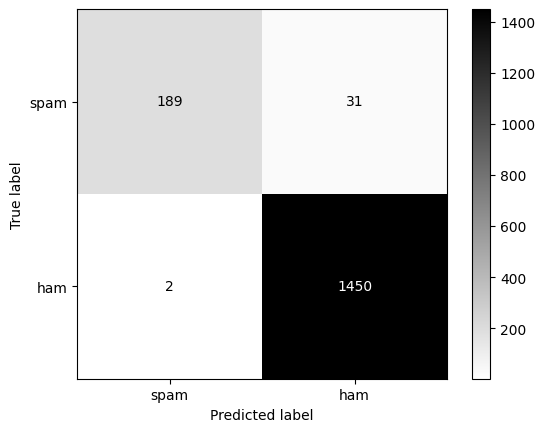

In [71]:
plt.style.use('default')
cm = confusion_matrix(test_y, voting_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['spam','ham'])
disp.plot(cmap='binary')

In [72]:
X = df['SMS']
y = df['Type']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state = 8888)
max_len = max(max(train_X.apply(len).values),max(test_X.apply(len).values))

def fit_tokenizer(text, oov_token):
    tokenizer = Tokenizer(oov_token = oov_token)
    tokenizer.fit_on_texts(text)
    return tokenizer

# for sequence, padding
def seq_padding(sentences, tokenizer, padding, truncating, maxlen):
    sequences = tokenizer.texts_to_sequences(sentences)
    pad_trunc_sequences = pad_sequences(sequences, padding = padding, maxlen = maxlen, truncating=padding)
    return pad_trunc_sequences

tokenizer = fit_tokenizer(train_X, "<OOV>")

word_index = tokenizer.word_index
VOCAB_SIZE = len(word_index)

train_X = seq_padding(train_X,tokenizer, 'post', 'post',max_len)
test_X = seq_padding(test_X,tokenizer, 'post', 'post', max_len)

def callback(MATRIX, PATIENCE):

    callbacks = [EarlyStopping(monitor=MATRIX,
                                patience=PATIENCE,
                                restore_best_weights=True),
                  ModelCheckpoint('model',
                                  monitor=MATRIX,
                                  save_best_only=True,
                                  save_weights_only=True)]
    return callbacks

def LSTM_model(vocab_size, embedding_dim, maxlen):

    model = Sequential()
    model.add(Embedding(vocab_size+1,embedding_dim,input_length = maxlen))
    model.add(Bidirectional(LSTM(64,kernel_regularizer=keras.regularizers.l2(0.001))))

    tf.keras.layers.GlobalAveragePooling1D()

    model.add(Dense(6, activation = 'relu',kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(loss = 'binary_crossentropy',
                  optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                  metrics = ['Accuracy'])

    return model

model = LSTM_model(VOCAB_SIZE, 100, max_len)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 910, 100)          736400    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              84480     
 l)                                                              
                                                                 
 dense (Dense)               (None, 6)                 774       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 821,661
Trainable params: 821,661
Non-trainable params: 0
_________________________________________________________________


In [73]:
history = model.fit(train_X, train_y, epochs = 8, batch_size = 8, callbacks = callback('Accuracy', 2))

test_prediction_label = (model.predict(test_X) >= 0.5).astype("int32")
test_predict_proba = model.predict(test_X, verbose=0)

NN_accuracy = accuracy_score(test_y, test_prediction_label)
NN_AUC = roc_auc_score(test_y, test_prediction_label)
NN_recall = recall_score(test_y, test_prediction_label)
NN_f1 = f1_score(test_y, test_prediction_label)

print(NN_accuracy, NN_AUC, NN_recall, NN_f1)

Epoch 1/8
488/488 [==============================] - 484s 983ms/step - loss: 0.8650 - Accuracy: 0.8574
Epoch 2/8
488/488 [==============================] - 494s 1s/step - loss: 0.7222 - Accuracy: 0.8649
Epoch 3/8
53/53 [==============================] - 16s 282ms/step
0.868421052631579 0.5 1.0 0.9295774647887324


In [74]:
cv_accuracy_means.append(NN_accuracy)
cv_auc_means.append(NN_AUC)
cv_recall_means.append(NN_recall),
cv_f1_means.append(NN_f1)
model_name.append('NN')

In [75]:
plot_model_score(model_name, cv_accuracy_means, cv_auc_means, cv_recall_means, cv_f1_means,
                 'cross validation (5 fold)')